### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve, precision_score, recall_score, f1_score, cohen_kappa_score, mean_squared_error

### Set Options

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.float_format = '{:.6f}'.format

### Dataset - Processed file

In [48]:
df1 = pd.read_csv('Processed_file.csv')
df1.head(2)

,Unnamed: 0,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,SEAPOR503,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,No
1,1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,PITHOM412,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional,Yes


- Lets use the scaled data and dummy encoded data and use it as input variables, we already completed this in the previous file.

In [49]:
df = pd.read_csv('Scaled_data.csv')
df.head()

,Unnamed: 0,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,NotNewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,0,-0.783096,-0.578622,-1.042504,-0.289052,-0.413790,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,-0.565621,-0.366752,-0.255797,-0.105716,-0.720778,-0.490714,-0.310154,-0.470619,-0.569459,-0.020663,-0.275825,4.310567,0.382421,-0.524583,0.146016,0.487086,-0.077010,1.395945,-0.869616,4.662897,-0.128300,-0.169283,-0.103411,-0.140707,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,-0.940828,-0.973610,-1.252478,-0.401392,-0.413790,-0.125718,0.029233,0.030066,-0.631532,-0.373230,-0.658224,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.815173,-0.718593,-0.633746,-0.020663,-0.329540,4.004446,-0.434992,-0.524583,0.146016,-0.616767,4.426588,0.391631,0.889077,-0.180167,-0.128300,-0.169283,0.215243,-0.140707,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,2,-0.468083,-0.977390,-0.370584,-0.401392,-0.413790,-0.125718,0.037028,0.030066,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.687153,-0.712257,-0.490714,-0.850429,-0.689483,-0.653032,-0.020663,-0.329540,4.208527,-0.434992,-0.524583,-0.605213,-0.616767,5.640155,-0.247479,0.219099,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,3,0.528260,1.487037,1.183229,0.155811,-0.413790,-0.125718,0.656704,0.235483,5.085049,0.330172,1.227267,0.477033,0.856964,0.513561,9.796479,8.329790,4.432265,2.544956,3.184929,-0.020663,3.734865,4.106486,0.382421,0.955867,5.404621,2.694792,0.305185,-0.064876,-0.869616,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,-0.937453,-0.992509,-1.252478,-0.401392,-0.413790,-0.125718,0.044823,0.024994,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.862816,-0.729374,-0.653032,-0.020663,-0.329540,3.494244,0.382421,0.955867,1.648475,1.590939,1.857607,0.665534,1.391560,-0.180167,-0.128300,-0.169283,1.489856,2.469282,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [50]:
df.drop('Unnamed: 0', axis =1 , inplace = True)

In [51]:
X = df.copy()
X.head(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,NotNewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,-0.783096,-0.578622,-1.042504,-0.289052,-0.413790,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,-0.565621,-0.366752,-0.255797,-0.105716,-0.720778,-0.490714,-0.310154,-0.470619,-0.569459,-0.020663,-0.275825,4.310567,0.382421,-0.524583,0.146016,0.487086,-0.077010,1.395945,-0.869616,4.662897,-0.128300,-0.169283,-0.103411,-0.140707,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,-0.940828,-0.973610,-1.252478,-0.401392,-0.413790,-0.125718,0.029233,0.030066,-0.631532,-0.373230,-0.658224,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.815173,-0.718593,-0.633746,-0.020663,-0.329540,4.004446,-0.434992,-0.524583,0.146016,-0.616767,4.426588,0.391631,0.889077,-0.180167,-0.128300,-0.169283,0.215243,-0.140707,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [52]:
y = df1['Churn']
y[:5]

0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 68)
y_train (40837,)
X_test (10210, 68)
y_test (10210,)


- From step 1, we took the two best models i.e Logistic Regression and Random Forest Classifier. We will be using `Forward Selection` and `RFE` as the variable selection methods and take the important features and apply these two models on that selected data.

### Forward Selection

In [15]:
lon_reg = LogisticRegression()
lon_reg_forward = sfs(estimator=lon_reg, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')

sfs_forward = lon_reg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    1.8s finished

[2023-12-01 19:11:49] Features: 1/68 -- score: -0.4064568063233375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.0s finished

[2023-12-01 19:11:54] Features: 2/68 -- score: -0.40598030400622404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.8s finished

[2023-12-01 19:12:00] Features: 3/68 -- score: -0.4055038076231542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   24.7s finished

[2023-12-01 19:18:54] Features: 28/68 -- score: -0.39656876162098503[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   24.2s finished

[2023-12-01 19:19:19] Features: 29/68 -- score: -0.39668787062228617[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   20.8s finished

[2023-12-01 19:19:39] Features: 30/68 -- score: -0.3969261069457337[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   23.0s finished

[2023-12-01 19:20:02] Features

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   14.1s finished

[2023-12-01 19:29:15] Features: 56/68 -- score: -0.39728412800456175[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   13.2s finished

[2023-12-01 19:29:28] Features: 57/68 -- score: -0.3983564635339205[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   12.7s finished

[2023-12-01 19:29:41] Features: 58/68 -- score: -0.39859472952758657[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]:

In [16]:
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('MonthlyMinutes', 'DirectorAssistedCalls', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'OutboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls', 'UniqueSubs', 'Handsets', 'HandsetModels', 'AgeHH2', 'RetentionOffersAccepted', 'ChildrenInHH_Yes', 'TruckOwner_Yes', 'RVOwner_Yes', 'Homeownership_Unknown', 'OptOutMailings_Yes', 'NonUSTravel_Yes', 'OwnsComputer_Yes', 'HasCreditCard_Yes', 'NewCellphoneUser_Yes', 'NotNewCellphoneUser_Yes', 'MadeCallToRetentionTeam_Yes', 'CreditRating_3-Good', 'CreditRating_4-Medium', 'CreditRating_7-Lowest', 'PrizmCode_Rural', 'PrizmCode_Town', 'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Retired', 'Occupation_Student', 'MaritalStatus_Yes')

R-Squared:  -0.3953775147292667


- By using forward selection method, we got these 36 important variables, we shall be using these variables and run two models.
- Logistic Regression
- RandomForest Classifier

In [28]:
X_new = X[['MonthlyMinutes', 'DirectorAssistedCalls', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'OutboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls', 'UniqueSubs', 'Handsets', 'HandsetModels', 'AgeHH2', 'RetentionOffersAccepted', 'ChildrenInHH_Yes', 'TruckOwner_Yes', 'RVOwner_Yes', 'Homeownership_Unknown', 'OptOutMailings_Yes', 'NonUSTravel_Yes', 'OwnsComputer_Yes', 'HasCreditCard_Yes', 'NewCellphoneUser_Yes', 'NotNewCellphoneUser_Yes', 'MadeCallToRetentionTeam_Yes', 'CreditRating_3-Good', 'CreditRating_4-Medium', 'CreditRating_7-Lowest', 'PrizmCode_Rural', 'PrizmCode_Town', 'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Retired', 'Occupation_Student', 'MaritalStatus_Yes']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 36)
y_train (40837,)
X_test (10210, 36)
y_test (10210,)


In [30]:
def model_train_and_score(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    print("**************************************************")
    print("________"+estimator.__class__.__name__+"__________")
    print()
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}".format(precision_score(y_test, y_pred, average = 'weighted')))
    print("Recall: {}".format(recall_score(y_test, y_pred, average = 'weighted')))
    print("F1 Score: {}".format(f1_score(y_test, y_pred, average = 'weighted')))
    print()
    print('Classification Report on train data \n',classification_report(y_train,y_pred_train))
    print()
    print('Classification Report on test data \n',classification_report(y_test,y_pred))
    print()
    print("**************************************************") 

In [31]:
model_train_and_score(LogisticRegression(), X_train, y_train, X_test, y_test)

**************************************************
________LogisticRegression__________

Accuracy: 0.7161606268364349
Precision: 0.6615653778604313
Recall: 0.7161606268364349
F1 Score: 0.6070325673252278

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.71      0.99      0.83     29028
           1       0.60      0.02      0.04     11809

    accuracy                           0.71     40837
   macro avg       0.66      0.51      0.44     40837
weighted avg       0.68      0.71      0.60     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83      7308
           1       0.52      0.02      0.04      2902

    accuracy                           0.72     10210
   macro avg       0.62      0.51      0.44     10210
weighted avg       0.66      0.72      0.61     10210


**************************************************


In [32]:
model_train_and_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.7201762977473065
Precision: 0.6797220305696884
Recall: 0.7201762977473065
F1 Score: 0.631387808300156

Classification Report on train data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29028
           1       1.00      1.00      1.00     11809

    accuracy                           1.00     40837
   macro avg       1.00      1.00      1.00     40837
weighted avg       1.00      1.00      1.00     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.98      0.83      7308
           1       0.56      0.07      0.12      2902

    accuracy                           0.72     10210
   macro avg       0.64      0.52      0.48     10210
weighted avg       0.68      0.72      0.63     10210


**************************************************


In [34]:
# Now lets use RFE and follow the same process as sfs.

### Recursive Feature Elimination(RFE)

In [19]:
logreg_rfe = LogisticRegression()
rfe_model = RFE(estimator=logreg_rfe, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['PercChangeMinutes', 'MonthsInService', 'UniqueSubs',
       'CurrentEquipmentDays', 'HandsetRefurbished_Yes',
       'HandsetWebCapable_Yes', 'BuysViaMailOrder_Yes', 'OwnsMotorcycle_Yes',
       'MadeCallToRetentionTeam_Yes', 'CreditRating_5-Low', 'PrizmCode_Rural',
       'Occupation_Retired'],
      dtype='object')


In [25]:
rf_rfe = RandomForestClassifier()
rfe_model = RFE(estimator=rf_rfe, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['PercChangeMinutes', 'MonthsInService', 'UniqueSubs',
       'CurrentEquipmentDays', 'HandsetRefurbished_Yes',
       'HandsetWebCapable_Yes', 'BuysViaMailOrder_Yes', 'OwnsMotorcycle_Yes',
       'MadeCallToRetentionTeam_Yes', 'CreditRating_5-Low', 'PrizmCode_Rural',
       'Occupation_Retired'],
      dtype='object')


In [26]:
# Both Random Forest and Logistic Regression gave the same important features.

In [21]:
X_new = X[['PercChangeMinutes', 'MonthsInService', 'UniqueSubs',
       'CurrentEquipmentDays', 'HandsetRefurbished_Yes',
       'HandsetWebCapable_Yes', 'BuysViaMailOrder_Yes', 'OwnsMotorcycle_Yes',
       'MadeCallToRetentionTeam_Yes', 'CreditRating_5-Low', 'PrizmCode_Rural',
       'Occupation_Retired']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 12)
y_train (40837,)
X_test (10210, 12)
y_test (10210,)


In [23]:
def model_train_and_score(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    print("**************************************************")
    print("________"+estimator.__class__.__name__+"__________")
    print()
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}".format(precision_score(y_test, y_pred, average = 'weighted')))
    print("Recall: {}".format(recall_score(y_test, y_pred, average = 'weighted')))
    print("F1 Score: {}".format(f1_score(y_test, y_pred, average = 'weighted')))
    print()
    print('Classification Report on train data \n',classification_report(y_train,y_pred_train))
    print()
    print('Classification Report on test data \n',classification_report(y_test,y_pred))
    print()
    print("**************************************************") 

In [24]:
model_train_and_score(LogisticRegression(), X_train, y_train, X_test, y_test)

**************************************************
________LogisticRegression__________

Accuracy: 0.713026444662096
Precision: 0.6288296306973846
Recall: 0.713026444662096
F1 Score: 0.6062146582349943

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.71      0.99      0.83     29028
           1       0.51      0.02      0.05     11809

    accuracy                           0.71     40837
   macro avg       0.61      0.51      0.44     40837
weighted avg       0.66      0.71      0.60     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83      7308
           1       0.41      0.02      0.04      2902

    accuracy                           0.71     10210
   macro avg       0.56      0.50      0.44     10210
weighted avg       0.63      0.71      0.61     10210


**************************************************


In [27]:
model_train_and_score(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.673947110675808
Precision: 0.6287830689285603
Recall: 0.673947110675808
F1 Score: 0.641278934934506

Classification Report on train data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29028
           1       1.00      1.00      1.00     11809

    accuracy                           1.00     40837
   macro avg       1.00      1.00      1.00     40837
weighted avg       1.00      1.00      1.00     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79      7308
           1       0.37      0.21      0.27      2902

    accuracy                           0.67     10210
   macro avg       0.55      0.53      0.53     10210
weighted avg       0.63      0.67      0.64     10210


**************************************************


In [38]:
scorecard=pd.DataFrame(columns=['Model','Precision','Recall','F1_score','Train_Accuracy','Test_Accuracy','Kappa_score','RMSE'])
def model_accuracy(model_name,classifier,X_train,y_train,X_test,y_test):
    
    # traing data 
    model=classifier.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    #testing data
    y_test_pred=model.predict(X_test)
    
    Train_accuracy=model.score(X_train,y_train)
    Test_accuracy=model.score(X_test,y_test)
    
    global scorecard
    scorecard=scorecard.append({'Model':model_name
                               ,'Precision':precision_score(y_test,y_test_pred, average = 'weighted')
                               ,'Recall':recall_score(y_test,y_test_pred, average = 'weighted')
                               ,'F1_score':f1_score(y_test,y_test_pred, average = 'weighted')
                               ,'Train_Accuracy':Train_accuracy
                               ,'Test_Accuracy':Test_accuracy
                               ,'Kappa_score':cohen_kappa_score(y_test,y_test_pred),
                               'RMSE':np.sqrt(mean_squared_error(y_test, y_test_pred))},ignore_index=True
                              )

In [39]:
model_accuracy('Random Forest', RandomForestClassifier(), X_train, y_train, X_test, y_test)

In [40]:
model_accuracy('Logistic Regression', LogisticRegression(), X_train, y_train, X_test, y_test)

In [43]:
model_accuracy('Decision Tree', DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

In [44]:
model_accuracy('Naive Bayes', GaussianNB(), X_train, y_train, X_test, y_test)

In [45]:
scorecard

,Model,Precision,Recall,F1_score,Train_Accuracy,Test_Accuracy,Kappa_score,RMSE
0,Random Forest,0.680243,0.720372,0.632340,0.999657,0.720372,0.066581,0.528798
1,Logistic Regression,0.661565,0.716161,0.607033,0.712932,0.716161,0.016875,0.532766
2,Decision Tree,0.611597,0.604016,0.607630,0.999657,0.604016,0.045341,0.629273
3,Naive Bayes,0.619792,0.677179,0.633070,0.673409,0.677179,0.052239,0.568173


`Inference`:

   - From step 1 , we used Logistic Regression and RandomForest as our best models since they were having almost the same accuracy.
   - Now we applied Forward selection and RFE to select the best important features.
   - After getting the important features, we shall apply those five models LR, RF, DT, KNN and NB.
   - After this, we shall use the two best models from step 3(we applied hyperparameter tuning) and we shall be using forward selection and RFE to select the important features.
   - Even here, the best model is Logistic Regression.

### Tuned Models

In [46]:
# Even in the tuned models, we have Logistic Regression and Random Forest as the best models.

### Forward Selection

In [54]:
log_reg = LogisticRegression(max_iter = 30, penalty = 'l2', random_state=53)
log_reg_forward = sfs(estimator=log_reg, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')

sfs_forward = log_reg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    1.8s finished

[2023-12-02 01:38:49] Features: 1/68 -- score: -0.4064568063233375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    4.5s finished

[2023-12-02 01:38:53] Features: 2/68 -- score: -0.40598030400622404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.3s finished

[2023-12-02 01:38:58] Features: 3/68 -- score: -0.4055038076231542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   10.6s finished

[2023-12-02 01:43:45] Features: 28/68 -- score: -0.395854065037444[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   12.8s finished

[2023-12-02 01:43:57] Features: 29/68 -- score: -0.3956158168459091[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   13.0s finished

[2023-12-02 01:44:10] Features: 30/68 -- score: -0.39561585270952837[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   14.7s finished

[2023-12-02 01:44:25] Features: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  3.8min finished

[2023-12-02 02:38:13] Features: 56/68 -- score: -0.39918973168318794[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.0min finished

[2023-12-02 02:41:11] Features: 57/68 -- score: -0.3997855403811871[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.1s finished

[2023-12-02 02:41:16] Features: 58/68 -- score: -0.3999044940599238[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: 

In [55]:
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('MonthlyMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'OffPeakCallsInOut', 'CallForwardingCalls', 'UniqueSubs', 'Handsets', 'HandsetModels', 'AgeHH2', 'RetentionOffersAccepted', 'ChildrenInHH_Yes', 'RVOwner_Yes', 'Homeownership_Unknown', 'HasCreditCard_Yes', 'NewCellphoneUser_Yes', 'NotNewCellphoneUser_Yes', 'MadeCallToRetentionTeam_Yes', 'CreditRating_4-Medium', 'CreditRating_6-VeryLow', 'CreditRating_7-Lowest', 'PrizmCode_Rural', 'PrizmCode_Town', 'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Retired', 'Occupation_Student', 'MaritalStatus_Yes')

R-Squared:  -0.3956158168459091


In [66]:
X_new = X[['MonthlyMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'OffPeakCallsInOut', 'CallForwardingCalls', 'UniqueSubs', 'Handsets', 'HandsetModels', 'AgeHH2', 'RetentionOffersAccepted', 'ChildrenInHH_Yes', 'RVOwner_Yes', 'Homeownership_Unknown', 'HasCreditCard_Yes', 'NewCellphoneUser_Yes', 'NotNewCellphoneUser_Yes', 'MadeCallToRetentionTeam_Yes', 'CreditRating_4-Medium', 'CreditRating_6-VeryLow', 'CreditRating_7-Lowest', 'PrizmCode_Rural', 'PrizmCode_Town', 'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Retired', 'Occupation_Student', 'MaritalStatus_Yes']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 29)
y_train (40837,)
X_test (10210, 29)
y_test (10210,)


In [68]:
def model_train_and_score(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    print("**************************************************")
    print("________"+estimator.__class__.__name__+"__________")
    print()
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}".format(precision_score(y_test, y_pred, average = 'weighted')))
    print("Recall: {}".format(recall_score(y_test, y_pred, average = 'weighted')))
    print("F1 Score: {}".format(f1_score(y_test, y_pred, average = 'weighted')))
    print()
    print('Classification Report on train data \n',classification_report(y_train,y_pred_train))
    print()
    print('Classification Report on test data \n',classification_report(y_test,y_pred))
    print()
    print("**************************************************") 

In [69]:
model_train_and_score(LogisticRegression(), X_train, y_train, X_test, y_test)

**************************************************
________LogisticRegression__________

Accuracy: 0.7160626836434868
Precision: 0.6602600403669666
Recall: 0.7160626836434868
F1 Score: 0.6066440211537621

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.71      0.99      0.83     29028
           1       0.59      0.02      0.04     11809

    accuracy                           0.71     40837
   macro avg       0.65      0.51      0.44     40837
weighted avg       0.68      0.71      0.60     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83      7308
           1       0.51      0.02      0.04      2902

    accuracy                           0.72     10210
   macro avg       0.62      0.51      0.43     10210
weighted avg       0.66      0.72      0.61     10210


**************************************************


In [70]:
model_train_and_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.7180215475024486
Precision: 0.6697976937313493
Recall: 0.7180215475024486
F1 Score: 0.6386926548179216

Classification Report on train data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29028
           1       1.00      1.00      1.00     11809

    accuracy                           1.00     40837
   macro avg       1.00      1.00      1.00     40837
weighted avg       1.00      1.00      1.00     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.97      0.83      7308
           1       0.52      0.09      0.15      2902

    accuracy                           0.72     10210
   macro avg       0.63      0.53      0.49     10210
weighted avg       0.67      0.72      0.64     10210


**************************************************


### RFE

In [71]:
logreg_rfe = LogisticRegression()
rfe_model = RFE(estimator=logreg_rfe, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['MonthlyMinutes', 'PercChangeMinutes', 'PercChangeRevenues',
       'UniqueSubs', 'HandsetModels', 'AgeHH2', 'MadeCallToRetentionTeam_Yes',
       'CreditRating_4-Medium', 'CreditRating_6-VeryLow', 'PrizmCode_Rural',
       'Occupation_Homemaker', 'Occupation_Student'],
      dtype='object')


In [72]:
rf_rfe = RandomForestClassifier()
rfe_model = RFE(estimator=rf_rfe, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['MonthlyMinutes', 'RoamingCalls', 'PercChangeMinutes',
       'PercChangeRevenues', 'OffPeakCallsInOut', 'UniqueSubs', 'Handsets',
       'HandsetModels', 'AgeHH2', 'ChildrenInHH_Yes', 'NewCellphoneUser_Yes',
       'Occupation_Other'],
      dtype='object')


#### Logistic Regression returned few important variables

In [74]:
X_new = X[['MonthlyMinutes', 'PercChangeMinutes', 'PercChangeRevenues',
       'UniqueSubs', 'HandsetModels', 'AgeHH2', 'MadeCallToRetentionTeam_Yes',
       'CreditRating_4-Medium', 'CreditRating_6-VeryLow', 'PrizmCode_Rural',
       'Occupation_Homemaker', 'Occupation_Student']]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 12)
y_train (40837,)
X_test (10210, 12)
y_test (10210,)


In [76]:
model_train_and_score(LogisticRegression(), X_train, y_train, X_test, y_test)

**************************************************
________LogisticRegression__________

Accuracy: 0.7156709108716944
Precision: 0.6541665493393762
Recall: 0.7156709108716944
F1 Score: 0.6049118703789059

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83     29028
           1       0.58      0.02      0.03     11809

    accuracy                           0.71     40837
   macro avg       0.64      0.51      0.43     40837
weighted avg       0.67      0.71      0.60     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83      7308
           1       0.49      0.02      0.03      2902

    accuracy                           0.72     10210
   macro avg       0.61      0.50      0.43     10210
weighted avg       0.65      0.72      0.60     10210


**************************************************


In [77]:
model_train_and_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.709892262487757
Precision: 0.6574184310782482
Recall: 0.709892262487757
F1 Score: 0.6506829194721512

Classification Report on train data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29028
           1       0.99      1.00      1.00     11809

    accuracy                           1.00     40837
   macro avg       1.00      1.00      1.00     40837
weighted avg       1.00      1.00      1.00     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.93      0.82      7308
           1       0.47      0.14      0.22      2902

    accuracy                           0.71     10210
   macro avg       0.60      0.54      0.52     10210
weighted avg       0.66      0.71      0.65     10210


**************************************************


In [78]:
X_new = X[['MonthlyMinutes', 'RoamingCalls', 'PercChangeMinutes',
       'PercChangeRevenues', 'OffPeakCallsInOut', 'UniqueSubs', 'Handsets',
       'HandsetModels', 'AgeHH2', 'ChildrenInHH_Yes', 'NewCellphoneUser_Yes',
       'Occupation_Other']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 12)
y_train (40837,)
X_test (10210, 12)
y_test (10210,)


In [80]:
model_train_and_score(LogisticRegression(), X_train, y_train, X_test, y_test)

**************************************************
________LogisticRegression__________

Accuracy: 0.7160626836434868
Precision: 0.7020539906610399
Recall: 0.7160626836434868
F1 Score: 0.598429263968691

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83     29028
           1       0.55      0.00      0.00     11809

    accuracy                           0.71     40837
   macro avg       0.63      0.50      0.42     40837
weighted avg       0.66      0.71      0.59     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.72      1.00      0.83      7308
           1       0.67      0.00      0.00      2902

    accuracy                           0.72     10210
   macro avg       0.69      0.50      0.42     10210
weighted avg       0.70      0.72      0.60     10210


**************************************************


In [81]:
model_train_and_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.7148873653281097
Precision: 0.6609735582363516
Recall: 0.7148873653281097
F1 Score: 0.6386921036043093

Classification Report on train data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29028
           1       1.00      1.00      1.00     11809

    accuracy                           1.00     40837
   macro avg       1.00      1.00      1.00     40837
weighted avg       1.00      1.00      1.00     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83      7308
           1       0.49      0.10      0.16      2902

    accuracy                           0.71     10210
   macro avg       0.61      0.53      0.49     10210
weighted avg       0.66      0.71      0.64     10210


**************************************************


### Scorecard

In [82]:
model_accuracy('Random Forest', RandomForestClassifier(), X_train, y_train, X_test, y_test)

In [83]:
model_accuracy('Logistic Regression', LogisticRegression(), X_train, y_train, X_test, y_test)

In [84]:
model_accuracy('Decision Tree', DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

In [85]:
model_accuracy('Naive Bayes', GaussianNB(), X_train, y_train, X_test, y_test)

In [86]:
scorecard

,Model,Precision,Recall,F1_score,Train_Accuracy,Test_Accuracy,Kappa_score,RMSE
0,Random Forest,0.680243,0.720372,0.632340,0.999657,0.720372,0.066581,0.528798
1,Logistic Regression,0.661565,0.716161,0.607033,0.712932,0.716161,0.016875,0.532766
2,Decision Tree,0.611597,0.604016,0.607630,0.999657,0.604016,0.045341,0.629273
3,Naive Bayes,0.619792,0.677179,0.633070,0.673409,0.677179,0.052239,0.568173
4,Random Forest,0.661307,0.715083,0.638201,0.998604,0.715083,0.074265,0.533776
5,Logistic Regression,0.702054,0.716063,0.598429,0.710924,0.716063,0.002369,0.532858
6,Decision Tree,0.618232,0.610284,0.614054,0.998604,0.610284,0.061601,0.624272
7,Naive Bayes,0.614110,0.701567,0.616123,0.693072,0.701567,0.020394,0.546290


`Inference`:

   - In the above scorecard, the first four results are using the step 1 and the next four results are after step3(basically tuning.
   - We can see almost the same results for both the models.
   - From this scorecard, we can select Logistic Regression as the best model since it is having no overfitting and also the accuracy score is almost 72%.
   - We shall consider the best model as `Logistic Regression`.

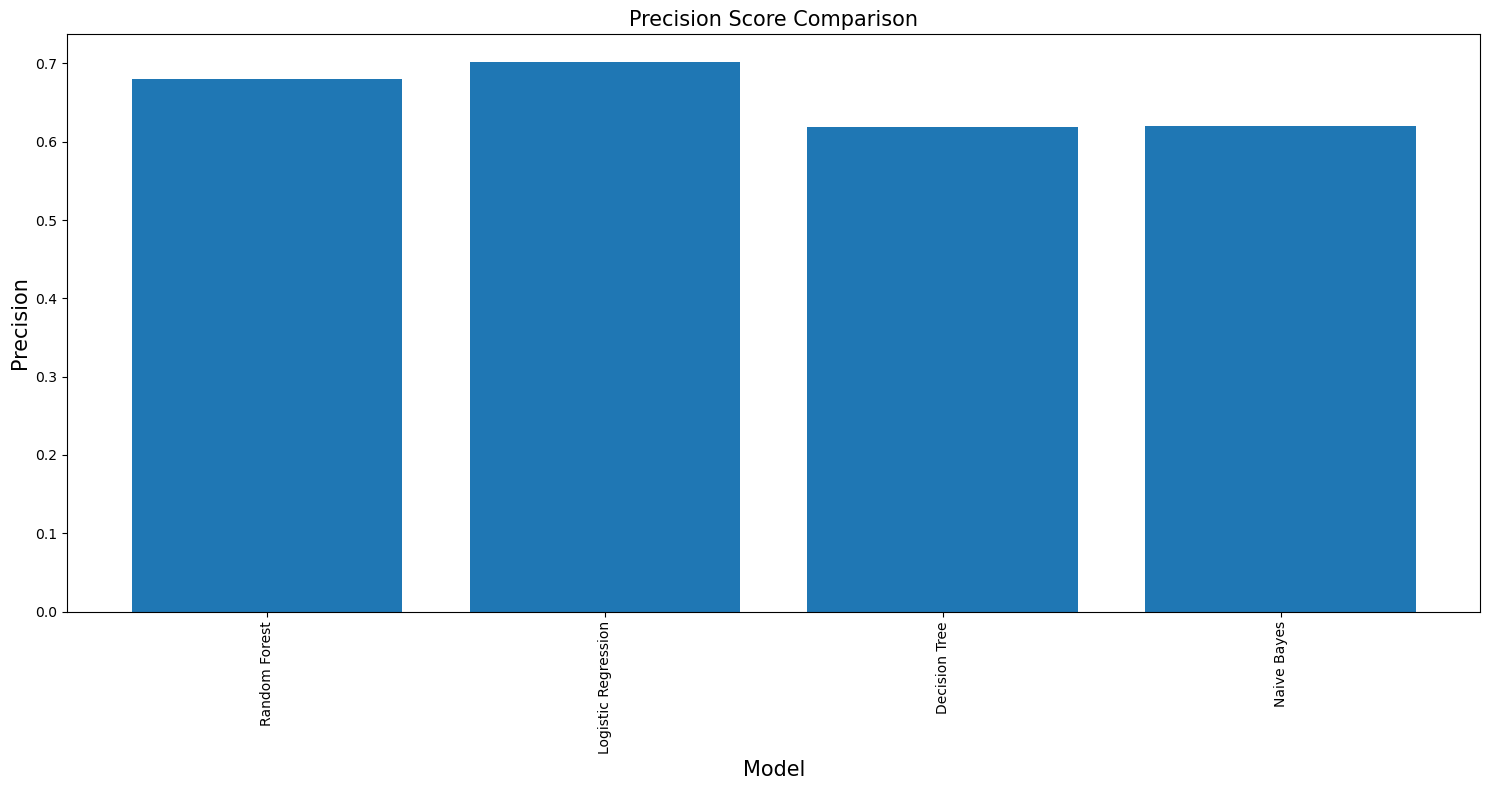

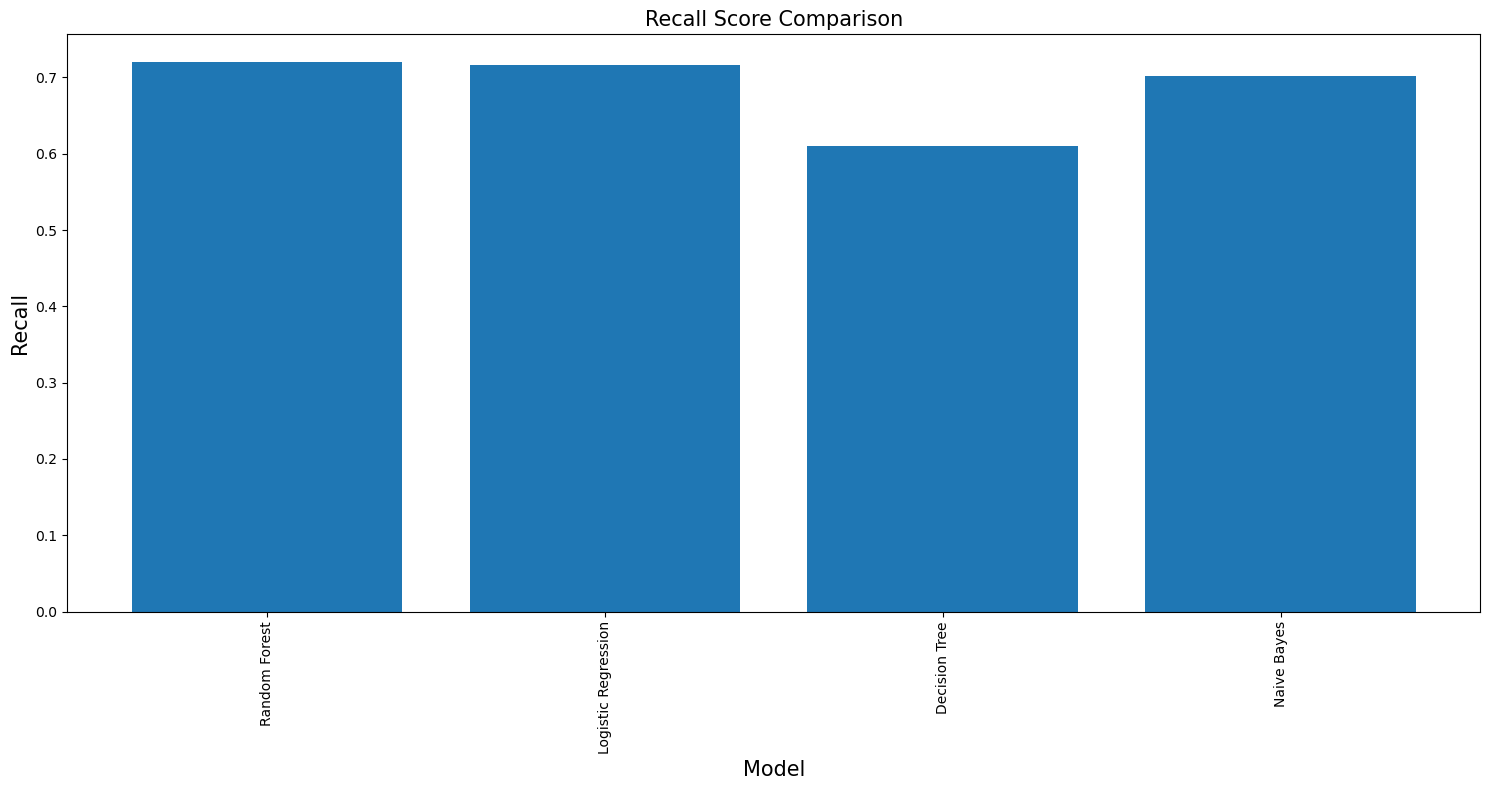

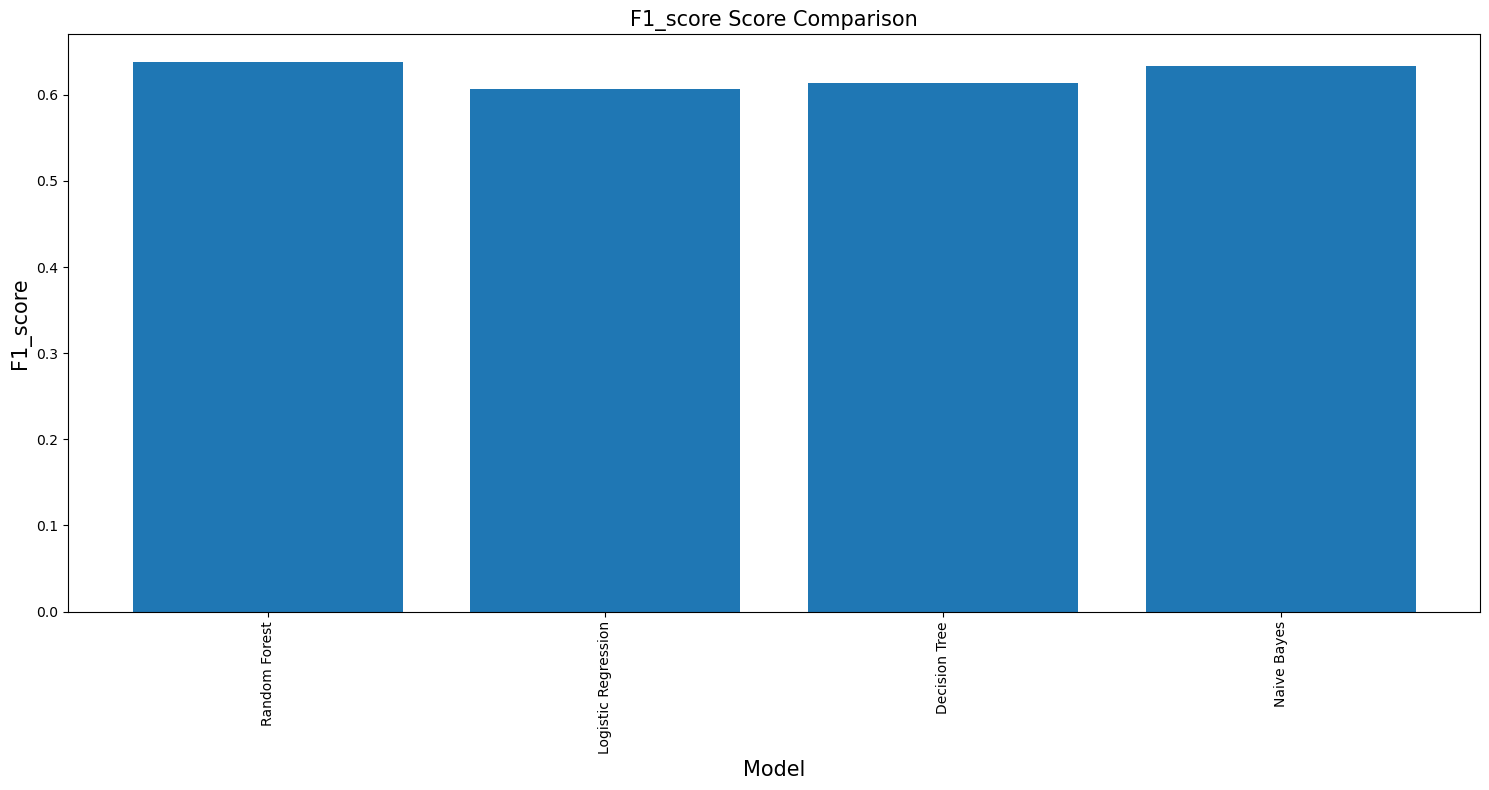

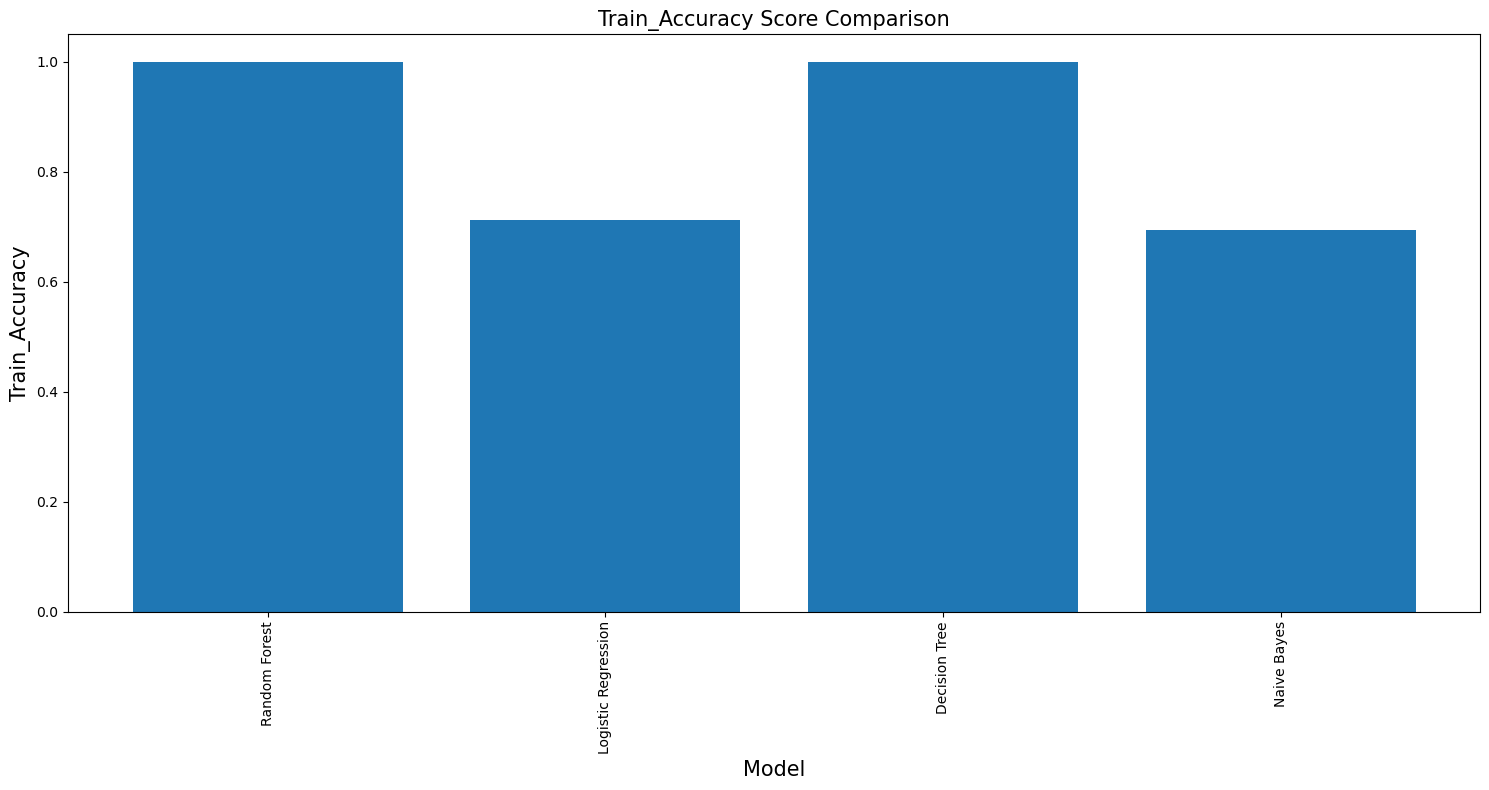

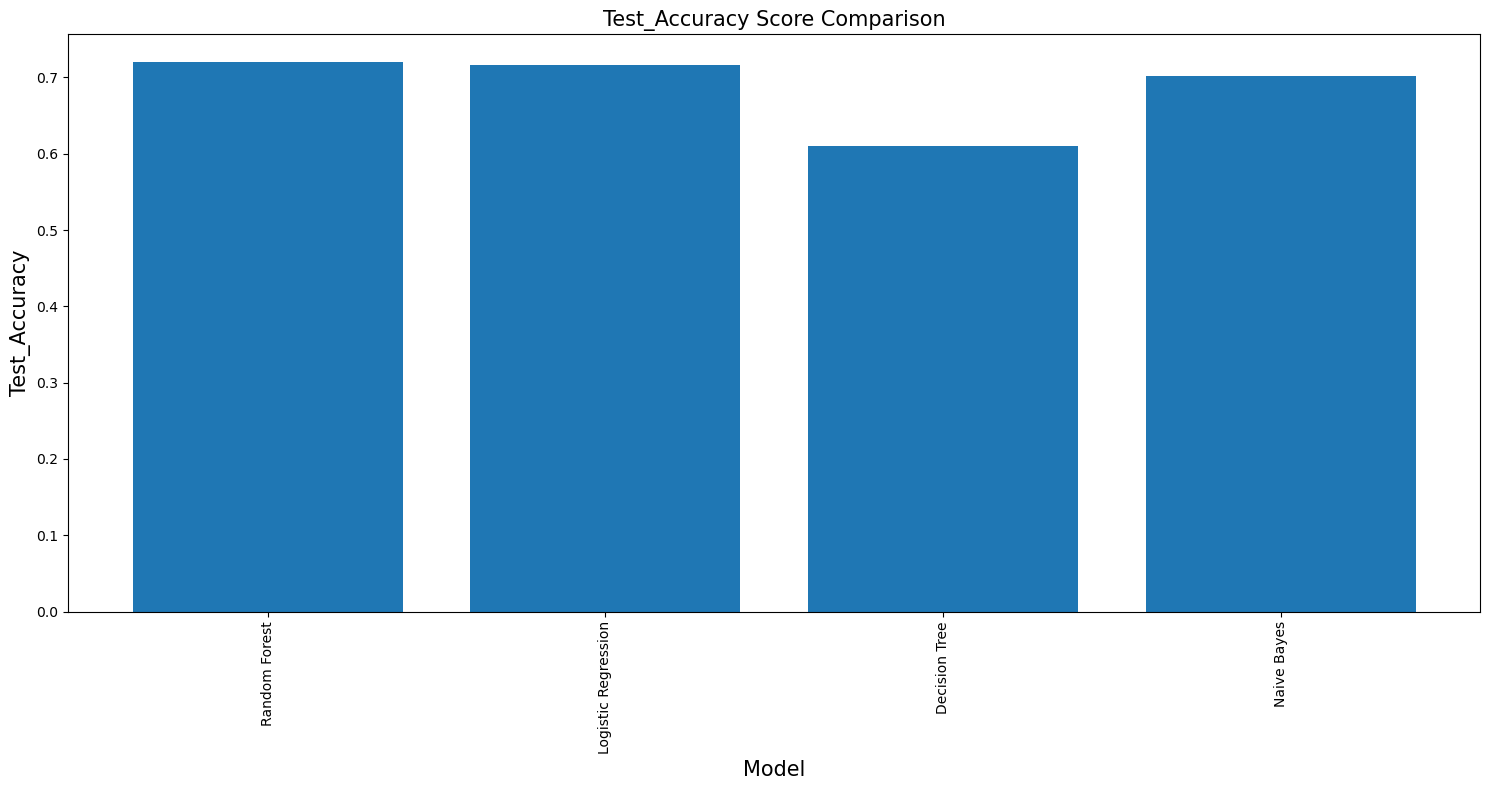

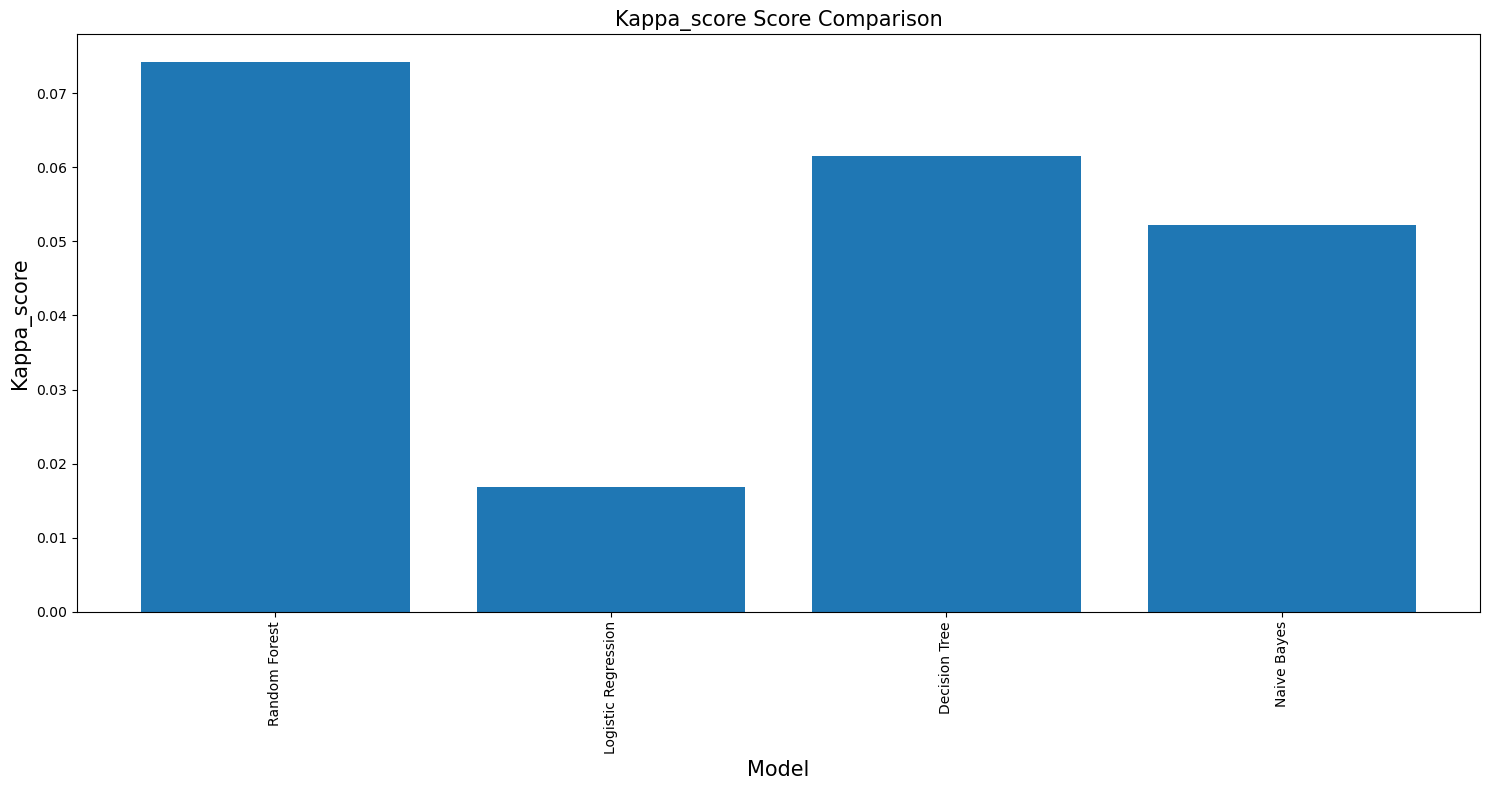

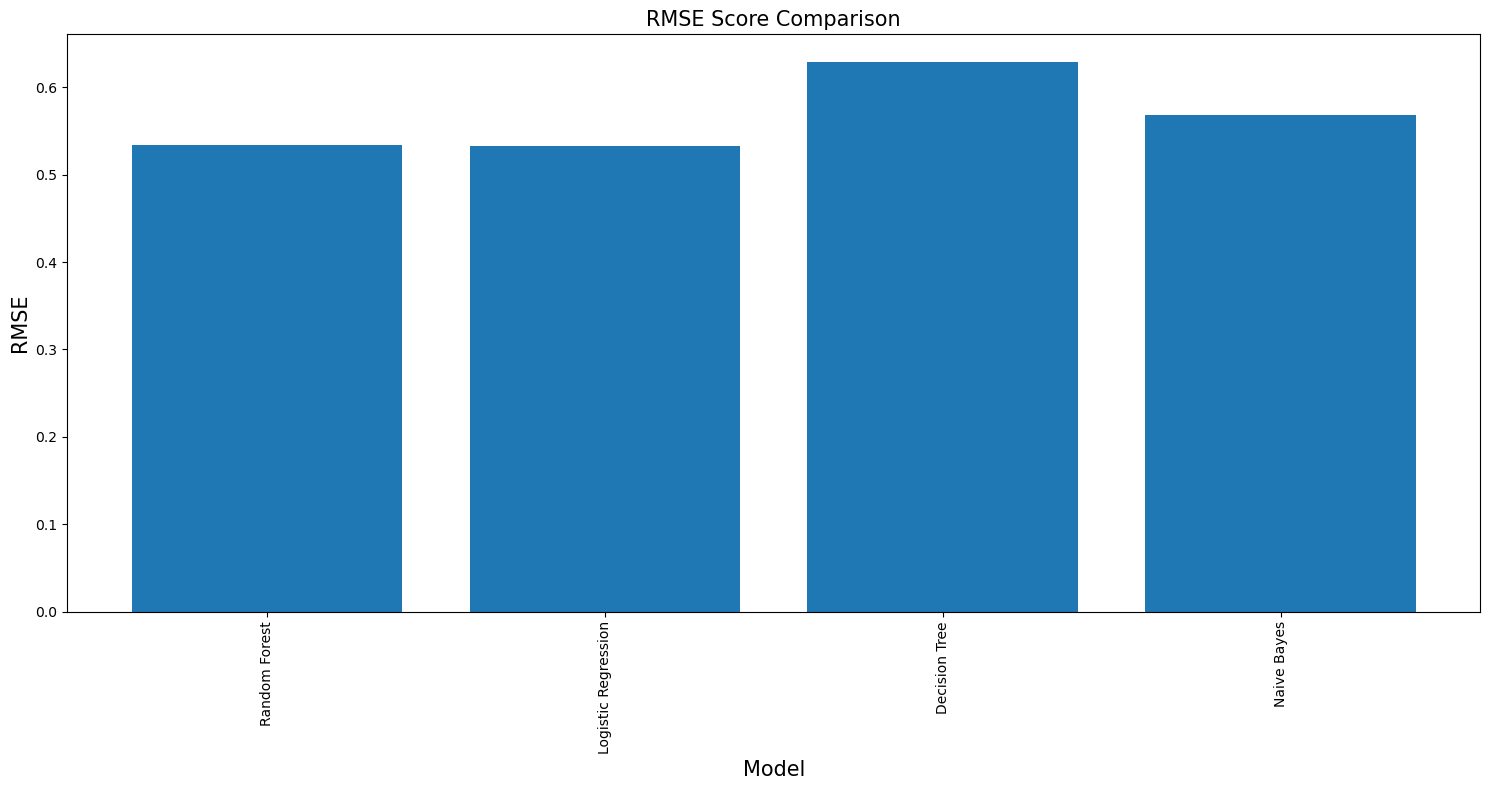

In [97]:
for j in scorecard.columns[1:]:
    plt.bar(scorecard['Model'], scorecard[j])

    plt.xticks(rotation=90)
    plt.xlabel('Model', fontsize = 15)
    plt.ylabel(j,fontsize = 15)
    plt.title(j + ' Score Comparison', fontsize = 15)

    plt.tight_layout()
    plt.show()

### Bias Variance Tradeoff

In [101]:
models = []
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))

In [102]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s: Bias error: %f Variance error: (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

Random Forest: Bias error: 0.376011 Variance error: (0.008597)
Logistic Regression: Bias error: 0.407996 Variance error: (0.007938)
Decision Tree: Bias error: 0.398182 Variance error: (0.005547)
Naive Bayes: Bias error: 0.390894 Variance error: (0.007591)


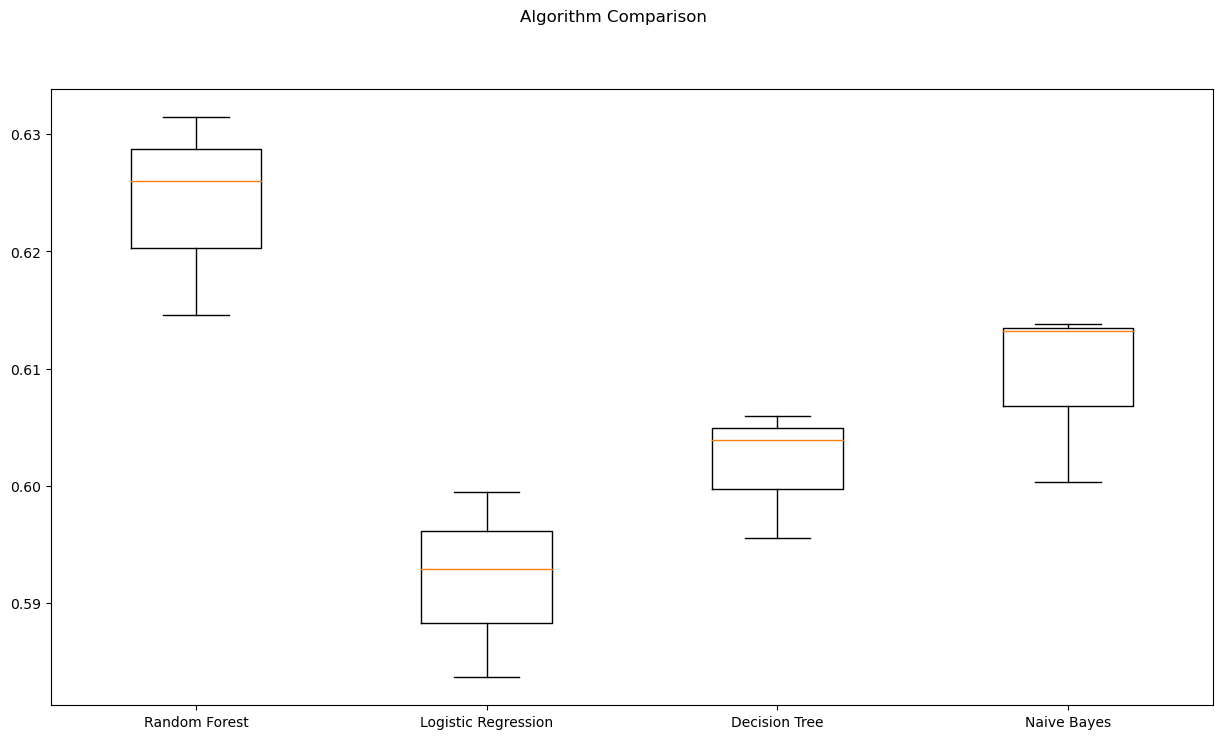

In [103]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()